In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

from src.model import StrangSplittingHodgkinHuxley

In [2]:
# Time parameters
duration = 200 # ms
time_step = 0.1 # ms
amount_steps = math.floor(duration / time_step)

In [3]:
# Instantiate neuron model
neuron = StrangSplittingHodgkinHuxley()

In [4]:
# Define inputs
inputs = np.zeros(amount_steps)
inputs[int(0.1*amount_steps):int(0.3*amount_steps)] = 10
inputs[int(0.5*amount_steps):int(0.7*amount_steps)] = 50

In [5]:
# Simulate for amount_steps
states = []
state = None

for i in range(math.floor(duration / time_step)):
    state = neuron(inputs[i], time_step, state)
    states.append(state)

In [6]:
states_array = np.array(states)
states_array.shape

(2000, 4)

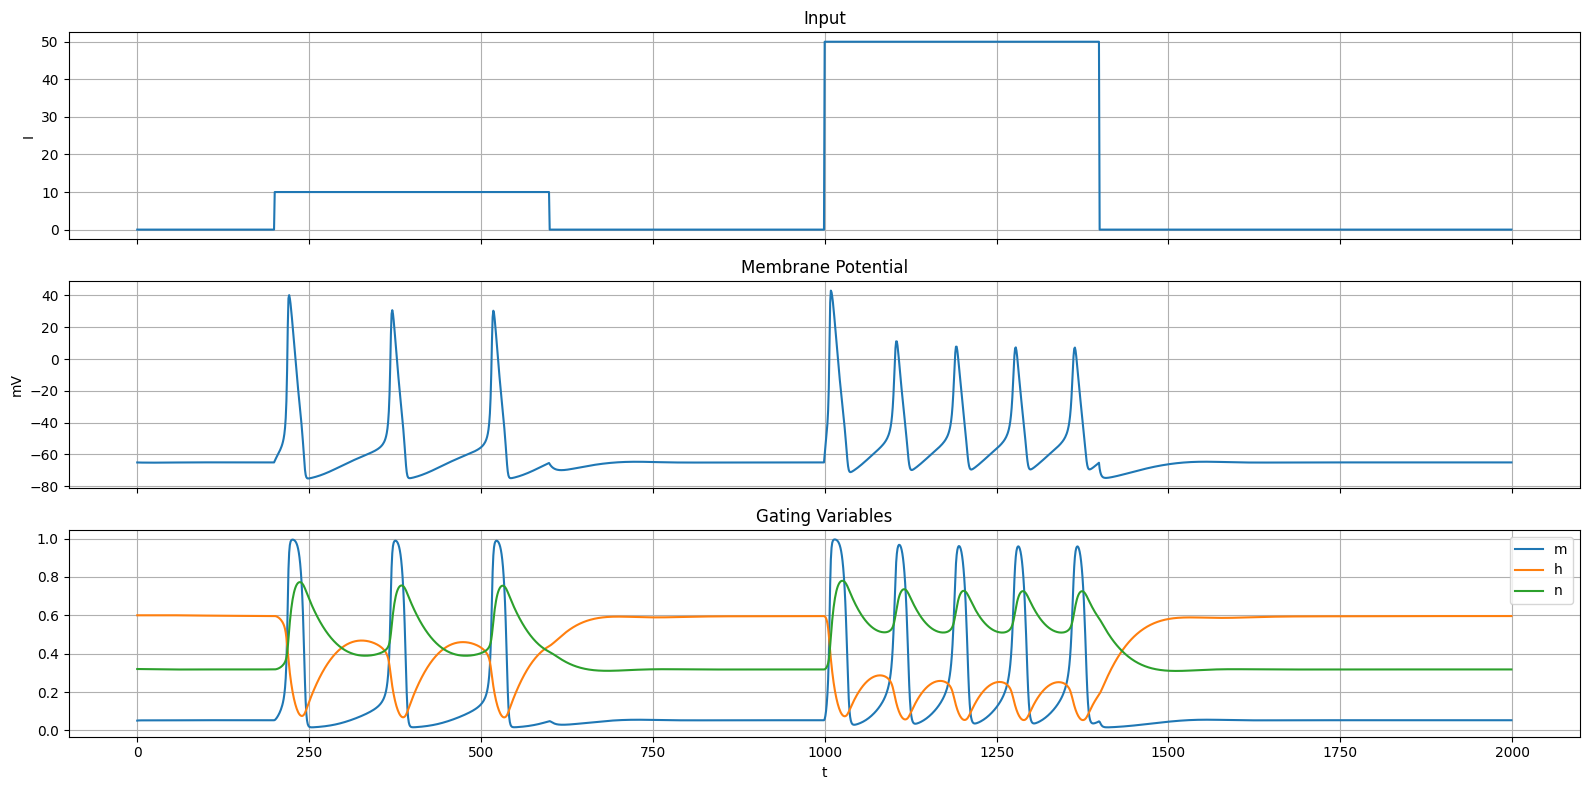

In [7]:
# Plotting
with plt.rc_context({'axes.grid': True, 'figure.autolayout': True}):
    _, axes = plt.subplots(3, 1, figsize=(16, 8), sharex=True)

    axes[0].plot(inputs)
    axes[0].set_title('Input')
    axes[0].set_ylabel('I')

    axes[1].plot(states_array[..., 0])
    axes[1].set_title('Membrane Potential')
    axes[1].set_ylabel('mV')

    axes[2].plot(states_array[..., 1:], label=['m', 'h', 'n'])
    axes[2].set_title('Gating Variables')
    axes[2].set_xlabel('t')
    axes[2].legend()

    plt.show()